# Plots

In [3]:
import matplotlib.transforms as transforms
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from skimage import metrics
from math import pi
import numpy as np
import os
path = os.path.abspath("../..")

In [3]:
## Loading all 4 generations of Predicted and Ground Truth validaiton dataset
GT_G0,  PD_G0  = np.load(path+'/Step_5_Engg_Alloys/Cu_Mn/predictions/GEN-0.npy',) # allow_pickle=True)
GT_G1,  PD_G1  = np.load(path+'/Step_5_Engg_Alloys/Cu_Mn/predictions/GEN-1.npy',) # allow_pickle=True)
GT_G2,  PD_G2  = np.load(path+'/Step_5_Engg_Alloys/Cu_Mn/predictions/GEN-2.npy',) # allow_pickle=True)
GT_G3,  PD_G3  = np.load(path+'/Step_5_Engg_Alloys/Cu_Mn/predictions/GEN-3.npy',) # allow_pickle=True)



def scale_array(arr):
    arr_min = np.min(arr)  ## Flattens the array and finds the min value inside it
    arr_max = np.max(arr)  ## Flattens the array and finds the max value inside it
    scaled_array = (arr - arr_min) / (arr_max - arr_min) * 255
    scaled_array = scaled_array.astype(np.uint8)
    
    return scaled_array

GT_G0_scaled, PD_G0_scaled = scale_array(GT_G0), scale_array(PD_G0)
GT_G1_scaled, PD_G1_scaled = scale_array(GT_G1), scale_array(PD_G1)
GT_G2_scaled, PD_G2_scaled = scale_array(GT_G2), scale_array(PD_G2)
GT_G3_scaled, PD_G3_scaled = scale_array(GT_G3), scale_array(PD_G3)

GT_G0.shape, PD_G0.shape, GT_G1.shape, PD_G1.shape, GT_G2.shape, PD_G2.shape, GT_G3.shape, PD_G3.shape

((100, 17, 64, 64, 1),
 (100, 17, 64, 64, 1),
 (100, 16, 64, 64, 1),
 (100, 16, 64, 64, 1),
 (100, 15, 64, 64, 1),
 (100, 15, 64, 64, 1),
 (100, 14, 64, 64, 1),
 (100, 14, 64, 64, 1))

## Shape Index

In [4]:
from scipy import ndimage as ndi
from skimage.feature import shape_index
from skimage.draw import disk
import matplotlib.patheffects as path_effects

[1] https://www.sciencedirect.com/science/article/abs/pii/026288569290076F?via%3Dihub

[2] https://journals.aps.org/prb/abstract/10.1103/PhysRevB.78.024113

The shape index is a single valued measure of local curvature of image microstructure and it is mathematically obtained from the eigen values of the Hessian [1], defined by Koenderink & van Doorn

The blue and magenta marks are points which deviate no more than 0.5 from the desired shape. 
To attenuate noise in the signal, the magenta marks are taken from the shape index (s) after another Gaussian blur pass (yielding s’).

Gaussian Smoothing sigma = 0.5


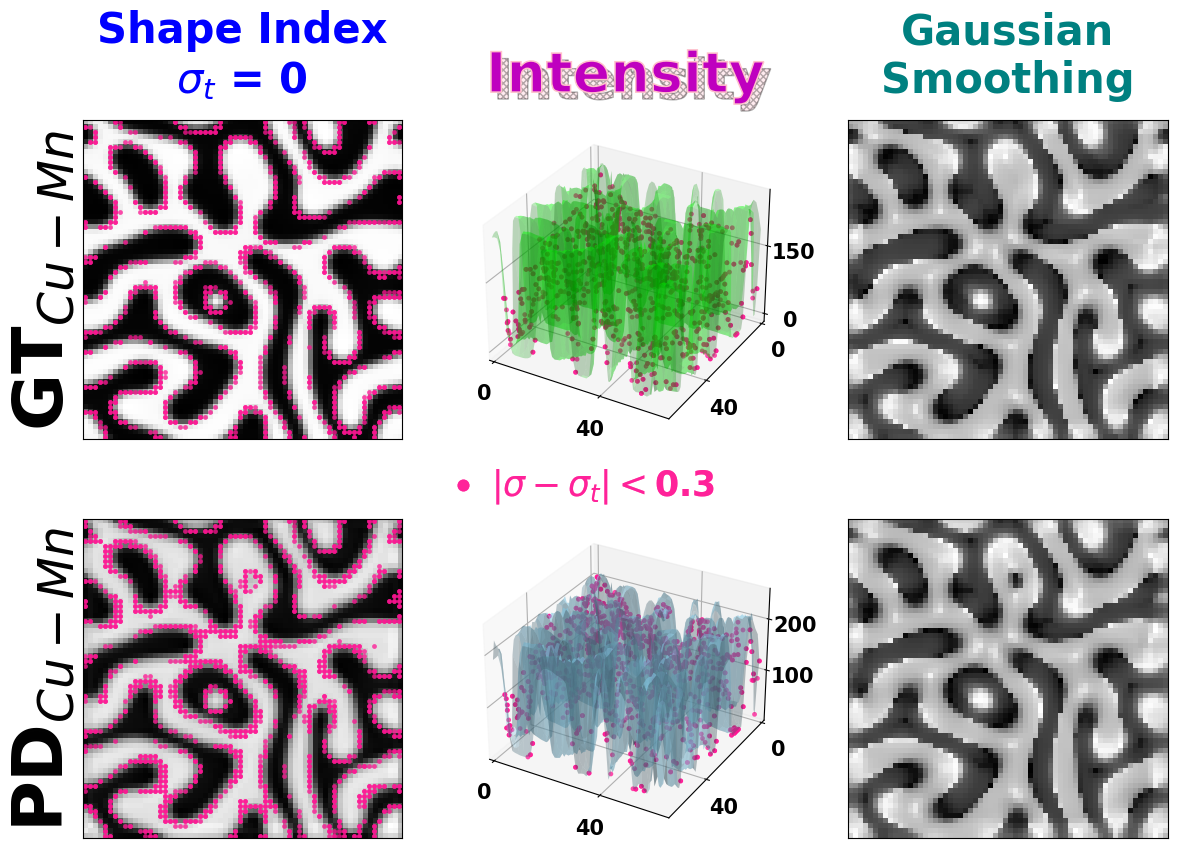

In [6]:

vs = 16
f = 5

VS_F = r"$_{VS_{%s}, f_{%s}}$"%(vs,f)
VS_F_P = r"$_{VS_{%s}, f'_{%s}}$"%(vs,f)

pd_img = PD_G0_scaled[vs,f,:,:,0]
gt_img = GT_G0_scaled[vs,f,:,:,0]

s = shape_index(gt_img)

target = 0
delta = 0.3

point_y, point_x = np.where(np.abs(s - target) < delta)
point_z = gt_img[point_y, point_x]
s_smooth = ndi.gaussian_filter(s, sigma=0.5)
point_y_s, point_x_s = np.where(np.abs(s_smooth - target) < delta)
point_z_s = gt_img[point_y_s, point_x_s]


fig = plt.figure(figsize=(14, 9.5))
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)


ax1 = fig.add_subplot(2, 3, 1)

ax1.imshow(gt_img, cmap=plt.cm.gray)
ax1.set_title('Shape Index\n$\sigma _t$ = 0', color="Blue", fontsize=30, weight='bold', pad=20)
ax1.set_ylabel(r'GT$_{Cu-Mn}$', fontsize=50, weight='bold')
scatter_settings = dict(alpha=0.75, s=12, linewidths=0)
ax1.scatter(point_x, point_y, color='deeppink', **scatter_settings)
ax1.scatter(point_x_s, point_y_s, color='deeppink', **scatter_settings)

ax2 = fig.add_subplot(2, 3, 2, projection='3d', sharex=ax1, sharey=ax1)
x, y = np.meshgrid(np.arange(0, gt_img.shape[0], 1), np.arange(0, gt_img.shape[1], 1))
ax2.plot_surface(x, y, gt_img, linewidth=0, alpha=0.25, color="lime")
sp2_0 = ax2.scatter(point_x, point_y, point_z, color='deeppink', label=r'$|s - 1|<$%s'%delta, **scatter_settings)
sp2_1 =ax2.scatter(point_x_s, point_y_s, point_z_s, color='deeppink', label='$|s\' - 1|<$%s'%delta, **scatter_settings)

# legend2_1 = ax2.legend(loc=2, prop={'weight':'bold', 'size':'15'}, markerscale=3, handlelength=0, handles=[sp2_0], labels=[r'$|s - 1|<$%s'%delta],  labelcolor='linecolor', frameon=False)
# legend2_2 = ax2.legend(loc=(-0.05,-0.2),  prop={'weight':'bold', 'size':'25'}, markerscale=2.5, handlelength=0, handles=[sp2_1], labels=['$|s\' - 1|<$%s'%delta],  labelcolor='linecolor', frameon=False)
# ax2.add_artist(legend2_1)

# ax2.axis('off')
ax2.set_title('Intensity', color='m', fontsize=40, weight='bold', pad=20).set_path_effects([ path_effects.PathPatchEffect(offset=(5, -5), hatch='xxxxx', facecolor='pink', alpha=0.3), path_effects.PathPatchEffect(edgecolor='pink', linewidth=1.1, facecolor='m')])

ax3 = fig.add_subplot(2, 3, 3, sharex=ax1, sharey=ax1)
ax3.imshow(s, cmap=plt.cm.gray)
# ax3.axis('off')
ax3.set_title('Gaussian\nSmoothing', color='teal', fontsize=30, weight='bold', pad=20)
# .set_title(r'Shape index, $\sigma=1$')

#############################################################

s = shape_index(pd_img)

target = 0.1
delta = 0.3


point_y, point_x = np.where(np.abs(s - target) < delta)
point_z = pd_img[point_y, point_x]


s_smooth = ndi.gaussian_filter(s, sigma=0.5)

point_y_s, point_x_s = np.where(np.abs(s_smooth - target) < delta)
point_z_s = pd_img[point_y_s, point_x_s]

ax4 = fig.add_subplot(2, 3, 4)

ax4.imshow(pd_img, cmap=plt.cm.gray)
ax4.set_ylabel(r'PD$_{Cu-Mn}$', fontsize=50, weight='bold')
scatter_settings = dict(alpha=0.75, s=12, linewidths=0)
ax4.scatter(point_x, point_y, color='deeppink', **scatter_settings)
ax4.scatter(point_x_s, point_y_s, color='deeppink', **scatter_settings)

ax5 = fig.add_subplot(2, 3, 5, projection='3d', sharex=ax1, sharey=ax1)
x, y = np.meshgrid(np.arange(0, pd_img.shape[0], 1), np.arange(0, pd_img.shape[1], 1))
ax5.plot_surface(x, y, pd_img, linewidth=0, alpha=0.35, color="skyblue")
sp5_0 = ax5.scatter(point_x, point_y, point_z, color='deeppink', label=r'$|s - 1|<$%s'%delta, **scatter_settings)
sp5_1 = ax5.scatter(point_x_s, point_y_s, point_z_s, color='deeppink', label='$|s\' - 1|<$%s'%delta, **scatter_settings)

legend5_1 = ax5.legend(loc=(-0.05,1.00), prop={'weight':'bold', 'size':'25'}, markerscale=2.5, handlelength=0, handles=[sp5_0], labels=[r'$|\sigma - \sigma _t|<$%s'%( delta)],  labelcolor='linecolor', frameon=False)
# legend5_2 = ax5.legend(loc=(0,0.95), prop={'weight':'bold', 'size':'15'}, markerscale=3, handlelength=0, handles=[sp5_1], labels=['$|s\' - 1|<$%s'%delta],  labelcolor='linecolor', frameon=False)
ax5.add_artist(legend5_1)

ax6 = fig.add_subplot(2, 3, 6, sharex=ax1, sharey=ax1)
ax6.imshow(s, cmap=plt.cm.gray,)


ax2.xaxis.set_major_locator(plt.MaxNLocator(2))
ax2.yaxis.set_major_locator(plt.MaxNLocator(2))
ax2.zaxis.set_major_locator(plt.MaxNLocator(2))
ax2.xaxis.set_major_locator(plt.MaxNLocator(2))
ax5.yaxis.set_major_locator(plt.MaxNLocator(2))
ax5.zaxis.set_major_locator(plt.MaxNLocator(2))


for label in ax2.get_xticklabels(): label.set_fontweight('bold')
for label in ax2.get_yticklabels(): label.set_fontweight('bold')
for label in ax2.get_zticklabels(): label.set_fontweight('bold')
for label in ax5.get_xticklabels(): label.set_fontweight('bold')
for label in ax5.get_yticklabels(): label.set_fontweight('bold')
for label in ax5.get_zticklabels(): label.set_fontweight('bold') 

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax2.tick_params(axis='both', labelcolor='black', labelsize=15, bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=True)
ax3.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax4.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax5.tick_params(axis='both', labelcolor='black', labelsize=15, bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=True)
ax6.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# fig.tight_layout()
plt.savefig(path+'/Step_5_Engg_Alloys/Cu_Mn/figures/shape_index_Cu_Mn.png', transparent=True)
plt.show()

## Blobs

In [7]:
from sklearn.model_selection import train_test_split
from math import sqrt
from skimage.feature import blob_dog, blob_log, blob_doh


In [8]:
GT_G0_sam, _, PD_G0_sam, _ = train_test_split(GT_G0, PD_G0, test_size=0.92, random_state=9)  ## Randomly sampling 10 video sequence for further anaylisis from Generation 0
GT_G0_sam_scaled, PD_G0_sam_scaled = scale_array(GT_G0_sam), scale_array(PD_G0_sam)

GT_G1_sam, _, PD_G1_sam, _ = train_test_split(GT_G1, PD_G1, test_size=0.92, random_state=9)  ## Randomly sampling 10 video sequence for further anaylisis from Generation 0
GT_G1_sam_scaled, PD_G1_sam_scaled = scale_array(GT_G1_sam), scale_array(PD_G1_sam)

GT_G2_sam, _, PD_G2_sam, _ = train_test_split(GT_G2, PD_G2, test_size=0.92, random_state=9)  ## Randomly sampling 10 video sequence for further anaylisis from Generation 0
GT_G2_sam_scaled, PD_G2_sam_scaled = scale_array(GT_G2_sam), scale_array(PD_G2_sam)

GT_G3_sam, _, PD_G3_sam, _ = train_test_split(GT_G3, PD_G3, test_size=0.92, random_state=9)  ## Randomly sampling 10 video sequence for further anaylisis from Generation 0
GT_G3_sam_scaled, PD_G3_sam_scaled = scale_array(GT_G3_sam), scale_array(PD_G3_sam)

In [9]:
LoG_GT_G0, LoG_PD_G0, DoG_GT_G0, DoG_PD_G0, ratio_LoG_G0, ratio_DoG_G0 = [], [], [], [], [], []
LoG_GT_G1, LoG_PD_G1, DoG_GT_G1, DoG_PD_G1, ratio_LoG_G1, ratio_DoG_G1 = [], [], [], [], [], []
LoG_GT_G2, LoG_PD_G2, DoG_GT_G2, DoG_PD_G2, ratio_LoG_G2, ratio_DoG_G2 = [], [], [], [], [], []
LoG_GT_G3, LoG_PD_G3, DoG_GT_G3, DoG_PD_G3, ratio_LoG_G3, ratio_DoG_G3 = [], [], [], [], [], []


for vs in range(GT_G0_sam_scaled.shape[0]):
    for f in range(GT_G0_sam_scaled.shape[1]):
        img_gt_G0 = GT_G0_sam_scaled[vs, f,:,:,0]
        img_pd_G0 = PD_G0_sam_scaled[vs, f,:,:,0]
    
        log_gt_G0 = blob_log(img_gt_G0, max_sigma=30, num_sigma=10, threshold=.1)
        log_pd_G0 = blob_log(img_pd_G0, max_sigma=30, num_sigma=10, threshold=.1)
        dog_gt_G0 = blob_dog(img_gt_G0, max_sigma=30, threshold=.1)
        dog_pd_G0 = blob_dog(img_pd_G0, max_sigma=30, threshold=.1)

        LoG_GT_G0.append(log_gt_G0.shape[0]) ## Counting no of blobs for LoG in Ground Truth Image
        LoG_PD_G0.append(log_pd_G0.shape[0]) ## Counting no of blobs for LoG in Predicted Image
        DoG_GT_G0.append(dog_gt_G0.shape[0]) ## Counting no of blobs for DoG in Ground Truth Image
        DoG_PD_G0.append(dog_pd_G0.shape[0]) ## Counting no of blobs for DoG in Predicted Image
        ratio_LoG_G0.append(round(log_pd_G0.shape[0]/log_gt_G0.shape[0] ,2))
        ratio_DoG_G0.append(round(dog_pd_G0.shape[0]/dog_gt_G0.shape[0] ,2))
    
    for f in range(GT_G1_sam_scaled.shape[1]):
        img_gt_G1 = GT_G1_sam_scaled[vs, f,:,:,0]
        img_pd_G1 = PD_G1_sam_scaled[vs, f,:,:,0]
    
        log_gt_G1 = blob_log(img_gt_G1, max_sigma=30, num_sigma=10, threshold=.1)
        log_pd_G1 = blob_log(img_pd_G1, max_sigma=30, num_sigma=10, threshold=.1)
        dog_gt_G1 = blob_dog(img_gt_G1, max_sigma=30, threshold=.1)
        dog_pd_G1 = blob_dog(img_pd_G1, max_sigma=30, threshold=.1)

        LoG_GT_G1.append(log_gt_G1.shape[0]) ## Counting no of blobs for LoG in Ground Truth Image
        LoG_PD_G1.append(log_pd_G1.shape[0]) ## Counting no of blobs for LoG in Predicted Image
        DoG_GT_G1.append(dog_gt_G1.shape[0]) ## Counting no of blobs for DoG in Ground Truth Image
        DoG_PD_G1.append(dog_pd_G1.shape[0]) ## Counting no of blobs for DoG in Predicted Image
        ratio_LoG_G1.append(round(log_pd_G1.shape[0]/log_gt_G1.shape[0] ,2))
        ratio_DoG_G1.append(round(dog_pd_G1.shape[0]/dog_gt_G1.shape[0] ,2))

    for f in range(GT_G2_sam_scaled.shape[1]):
        img_gt_G2 = GT_G2_sam_scaled[vs, f,:,:,0]
        img_pd_G2 = PD_G2_sam_scaled[vs, f,:,:,0]
    
        log_gt_G2 = blob_log(img_gt_G2, max_sigma=30, num_sigma=10, threshold=.1)
        log_pd_G2 = blob_log(img_pd_G2, max_sigma=30, num_sigma=10, threshold=.1)
        dog_gt_G2 = blob_dog(img_gt_G2, max_sigma=30, threshold=.1)
        dog_pd_G2 = blob_dog(img_pd_G2, max_sigma=30, threshold=.1)

        LoG_GT_G2.append(log_gt_G2.shape[0]) ## Counting no of blobs for LoG in Ground Truth Image
        LoG_PD_G2.append(log_pd_G2.shape[0]) ## Counting no of blobs for LoG in Predicted Image
        DoG_GT_G2.append(dog_gt_G2.shape[0]) ## Counting no of blobGibbs_CuMns for DoG in Ground Truth Image
        DoG_PD_G2.append(dog_pd_G2.shape[0]) ## Counting no of blobs for DoG in Predicted Image
        ratio_LoG_G2.append(round(log_pd_G2.shape[0]/log_gt_G2.shape[0] ,2))
        ratio_DoG_G2.append(round(dog_pd_G2.shape[0]/dog_gt_G2.shape[0] ,2))
        
    for f in range(GT_G3_sam_scaled.shape[1]):
        img_gt_G3 = GT_G3_sam_scaled[vs, f,:,:,0]
        img_pd_G3 = PD_G3_sam_scaled[vs, f,:,:,0]
    
        log_gt_G3 = blob_log(img_gt_G3, max_sigma=30, num_sigma=10, threshold=.1)
        log_pd_G3 = blob_log(img_pd_G3, max_sigma=30, num_sigma=10, threshold=.1)
        dog_gt_G3 = blob_dog(img_gt_G3, max_sigma=30, threshold=.1)
        dog_pd_G3 = blob_dog(img_pd_G3, max_sigma=30, threshold=.1)

        LoG_GT_G3.append(log_gt_G3.shape[0]) ## Counting no of blobs for LoG in Ground Truth Image
        LoG_PD_G3.append(log_pd_G3.shape[0]) ## Counting no of blobs for LoG in Predicted Image
        DoG_GT_G3.append(dog_gt_G3.shape[0]) ## Counting no of blobs for DoG in Ground Truth Image
        DoG_PD_G3.append(dog_pd_G3.shape[0]) ## Counting no of blobs for DoG in Predicted Image
        ratio_LoG_G3.append(round(log_pd_G3.shape[0]/log_gt_G3.shape[0] ,2))
        ratio_DoG_G3.append(round(dog_pd_G3.shape[0]/dog_gt_G3.shape[0] ,2))        

mean_G0, std_G0, var_G0 = np.mean(ratio_LoG_G0), np.std(ratio_LoG_G0), np.var(ratio_LoG_G0)
mean_G1, std_G1, var_G1 = np.mean(ratio_LoG_G1), np.std(ratio_LoG_G1), np.var(ratio_LoG_G1)
mean_G2, std_G2, var_G2 = np.mean(ratio_LoG_G2), np.std(ratio_LoG_G2), np.var(ratio_LoG_G2)
mean_G3, std_G3, var_G3 = np.mean(ratio_LoG_G3), np.std(ratio_LoG_G3), np.var(ratio_LoG_G3)




LoG_GT_G0, LoG_PD_G0, DoG_GT_G0, DoG_PD_G0, ratio_LoG_G0, ratio_DoG_G0 = np.array(LoG_GT_G0), np.array(LoG_PD_G0), np.array(DoG_GT_G0), np.array(DoG_PD_G0), np.array(ratio_LoG_G0), np.array(ratio_DoG_G0) 
LoG_GT_G1, LoG_PD_G1, DoG_GT_G1, DoG_PD_G1, ratio_LoG_G1, ratio_DoG_G1 = np.array(LoG_GT_G1), np.array(LoG_PD_G1), np.array(DoG_GT_G1), np.array(DoG_PD_G1), np.array(ratio_LoG_G1), np.array(ratio_DoG_G1) 
LoG_GT_G2, LoG_PD_G2, DoG_GT_G2, DoG_PD_G2, ratio_LoG_G2, ratio_DoG_G2 = np.array(LoG_GT_G2), np.array(LoG_PD_G2), np.array(DoG_GT_G2), np.array(DoG_PD_G2), np.array(ratio_LoG_G2), np.array(ratio_DoG_G2) 
LoG_GT_G3, LoG_PD_G3, DoG_GT_G3, DoG_PD_G3, ratio_LoG_G3, ratio_DoG_G3 = np.array(LoG_GT_G3), np.array(LoG_PD_G3), np.array(DoG_GT_G3), np.array(DoG_PD_G3), np.array(ratio_LoG_G3), np.array(ratio_DoG_G3) 

mean_LoG_G0, std_LoG_G0, var_LoG_G0 = np.mean(ratio_LoG_G0), np.std(ratio_LoG_G0), np.var(ratio_LoG_G0)
mean_LoG_G1, std_LoG_G1, var_LoG_G1 = np.mean(ratio_LoG_G1), np.std(ratio_LoG_G1), np.var(ratio_LoG_G1)
mean_LoG_G2, std_LoG_G2, var_LoG_G2 = np.mean(ratio_LoG_G2), np.std(ratio_LoG_G2), np.var(ratio_LoG_G2)
mean_LoG_G3, std_LoG_G3, var_LoG_G3 = np.mean(ratio_LoG_G3), np.std(ratio_LoG_G3), np.var(ratio_LoG_G3)

mean_DoG_G0, std_DoG_G0, var_DoG_G0 = np.mean(ratio_DoG_G0), np.std(ratio_DoG_G0), np.var(ratio_DoG_G0)
mean_DoG_G1, std_DoG_G1, var_DoG_G1 = np.mean(ratio_DoG_G1), np.std(ratio_DoG_G1), np.var(ratio_DoG_G1)
mean_DoG_G2, std_DoG_G2, var_DoG_G2 = np.mean(ratio_DoG_G2), np.std(ratio_DoG_G2), np.var(ratio_DoG_G2)
mean_DoG_G3, std_DoG_G3, var_DoG_G3 = np.mean(ratio_DoG_G3), np.std(ratio_DoG_G3), np.var(ratio_DoG_G3)

### Blobs

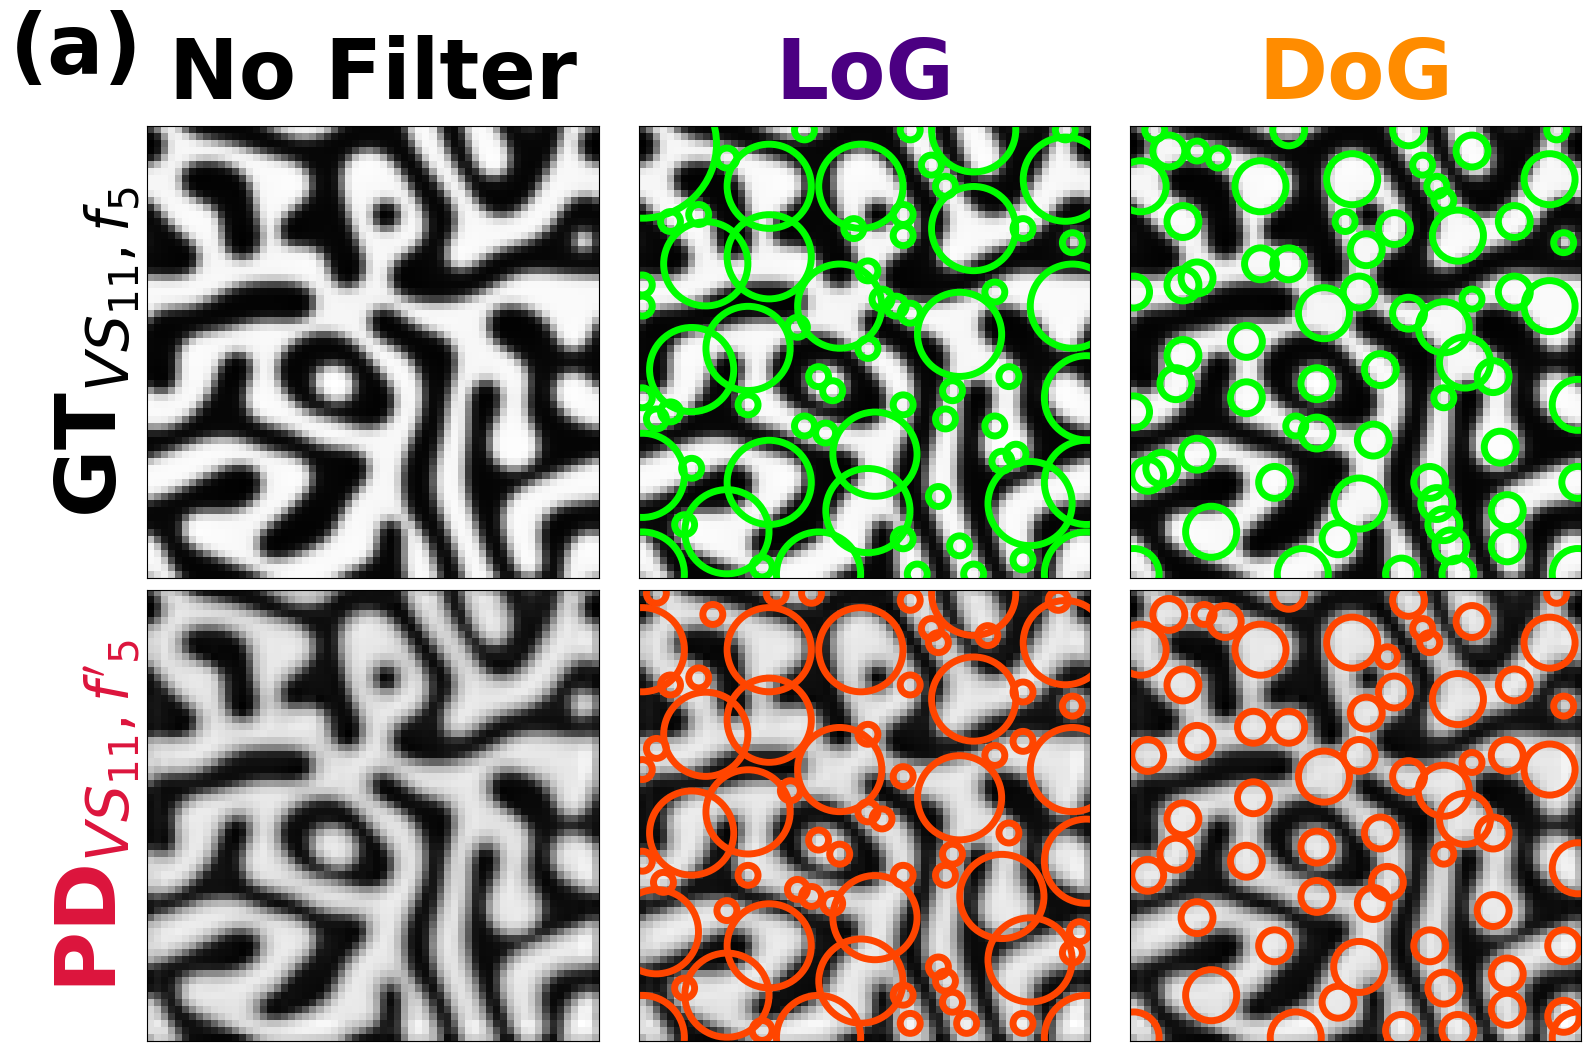

In [10]:


from skimage.feature import blob_dog, blob_log, blob_doh


vs = 11 ## Video sequence no
f = 5  ## Frame 
VS_F = r"$_{VS_{%s}, f_{%s}}$"%(vs,f)
VS_F_P = r"$_{VS_{%s}, f'_{%s}}$"%(vs,f)

img_gt = GT_G0_scaled[vs, f,:,:,0]
img_pd = PD_G0_scaled[vs, f,:,:,0]

log_gt = blob_log(img_gt, max_sigma=30, num_sigma=10, threshold=.1)
log_pd = blob_log(img_pd, max_sigma=30, num_sigma=10, threshold=.1)
log_gt[:, 2] = log_gt[:, 2] * sqrt(2)   # # Compute radii in the 3rd column.
log_pd[:, 2] = log_pd[:, 2] * sqrt(2)

dog_gt = blob_dog(img_gt, max_sigma=30, threshold=.1)
dog_pd = blob_dog(img_pd, max_sigma=30, threshold=.1)
dog_gt[:, 2] = dog_gt[:, 2] * sqrt(2)   # # Compute radii in the 3rd column.
dog_pd[:, 2] = dog_pd[:, 2] * sqrt(2)


plt.rcParams["figure.figsize"] = (16,10.5)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, )
Algo = ["LoG", "DoG"]

ax1.imshow(img_gt, 'gray')
ax1.set_ylabel('GT'+VS_F, fontsize=60, weight='bold', color = 'k')
ax1.set_title("No Filter", fontsize=60, weight='bold', pad=20)

ax2.imshow(img_gt, 'gray')
ax2.set_title(Algo[0], fontsize=60, weight='bold', pad=20, color ='indigo')

ax3.imshow(img_gt, 'gray')
ax3.set_title(Algo[1], fontsize=60, weight='bold', pad=20, color ='darkorange')

ax4.imshow(img_pd, 'gray')
ax4.set_ylabel('PD'+VS_F_P, fontsize=60, weight='bold', color ='crimson', )
ax5.imshow(img_pd, 'gray')
ax6.imshow(img_pd, 'gray')

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax2.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax3.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax4.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax5.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax6.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

for blob in log_gt:
      y, x, r = blob
      c = plt.Circle((x, y), r, color='lime', linewidth=5, linestyle='-', fill=False)
      ax2.add_patch(c)
for blob in dog_gt:
      y, x, r = blob
      c = plt.Circle((x, y), r, color='lime', linewidth=5, linestyle='-', fill=False)
      ax3.add_patch(c)
for blob in log_pd:
      y, x, r = blob
      c = plt.Circle((x, y), r, color='orangered', linewidth=5, linestyle='-', fill=False)
      ax5.add_patch(c)  
for blob in dog_pd:
      y, x, r = blob
      c = plt.Circle((x, y), r, color='orangered', linewidth=5, linestyle='-', fill=False)
      ax6.add_patch(c)


ax1.text(-20,-8,"(a)", fontsize=60, weight = 'bold', color = 'k')

plt.tight_layout()

plt.savefig(path+'/Step_5_Engg_Alloys/Cu_Mn/figures/blobs_Cu_Mn.png', transparent=True)

plt.show()

### Ratio

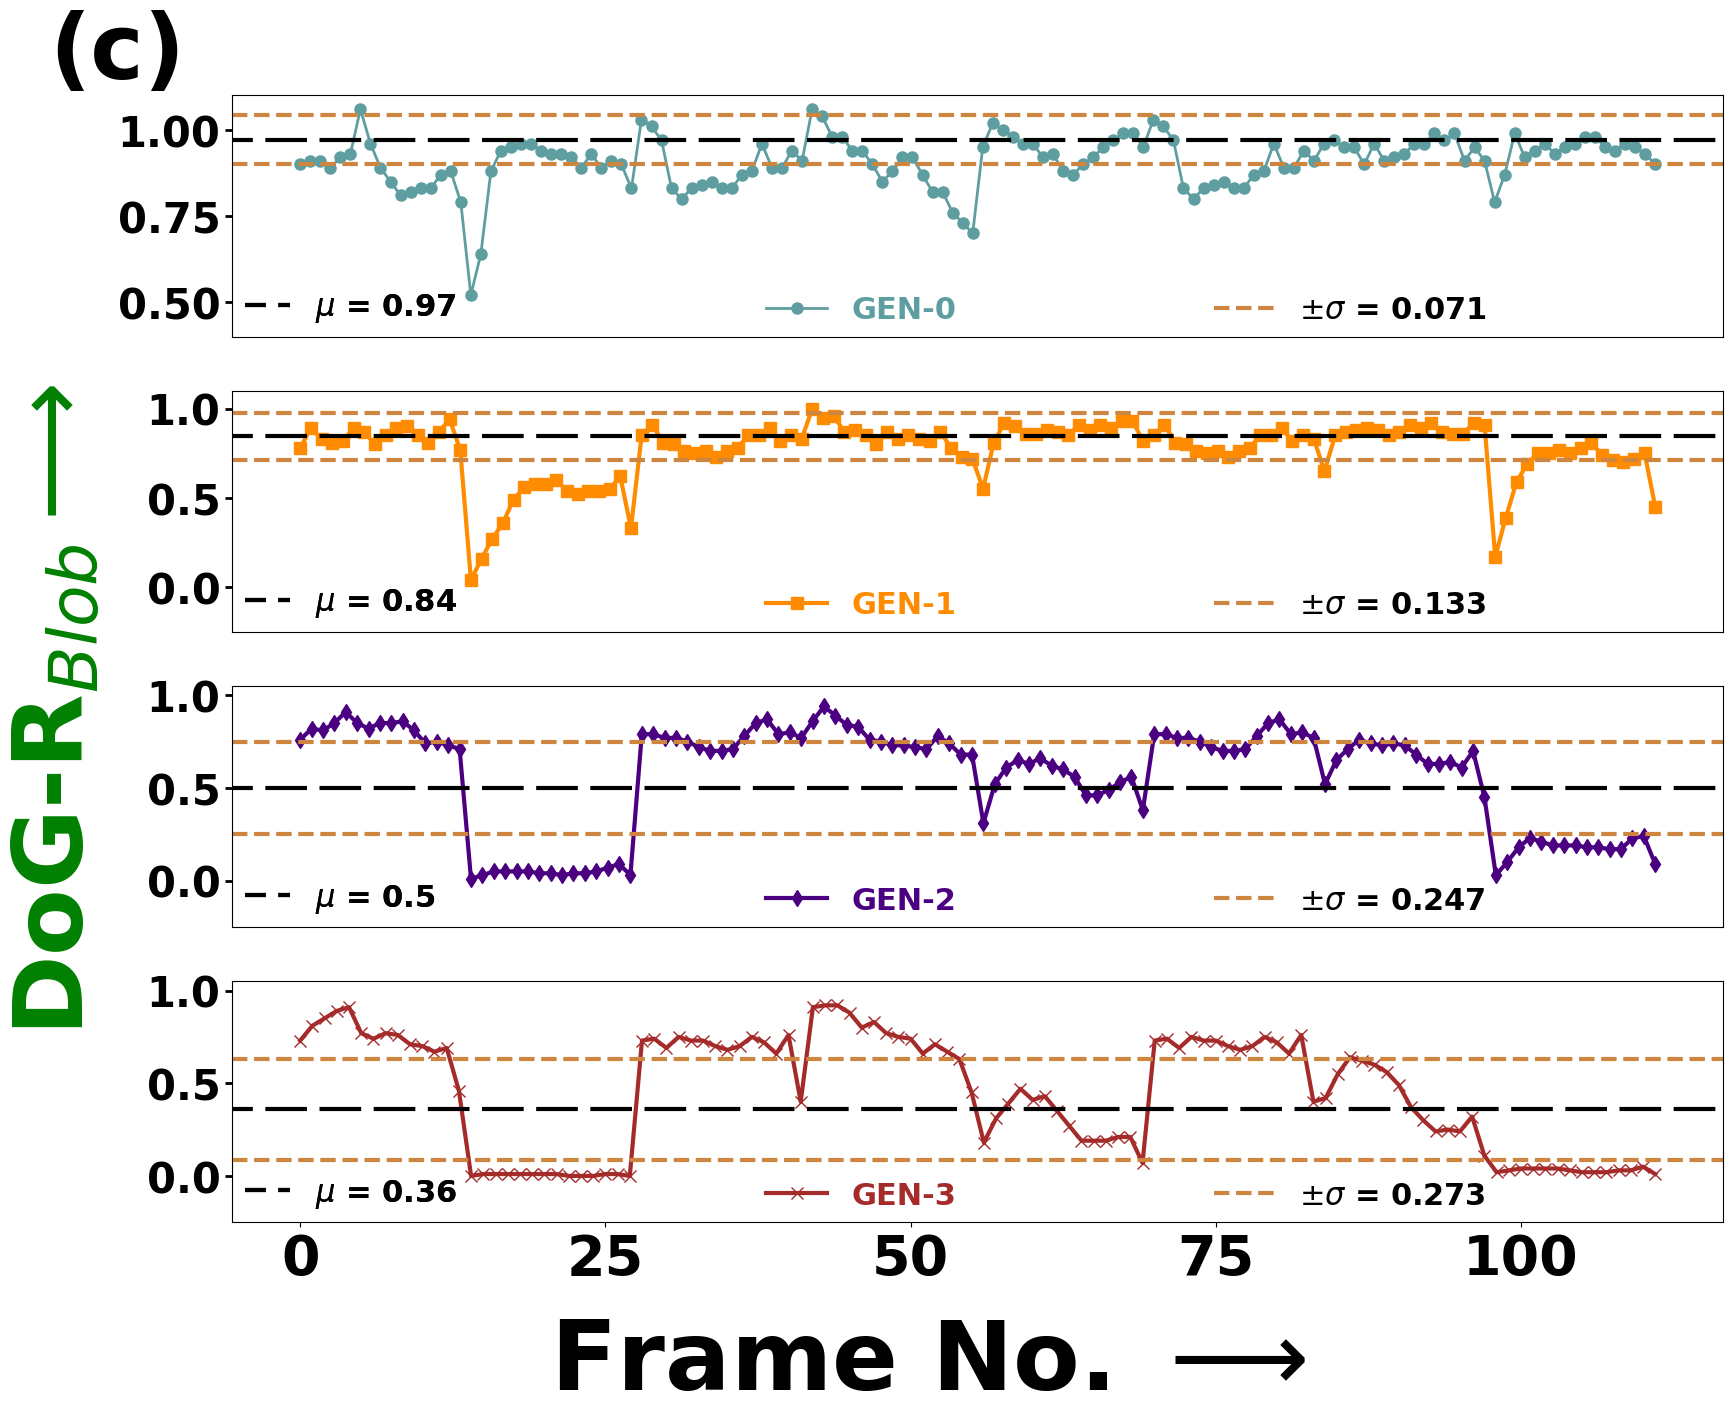

In [11]:
# plt.rcParams["figure.figsize"] = (12,14)
# fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(4, 1, )

# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=5)

plt.rcParams["figure.figsize"] = (18,14)
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(4, 1, )

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=9)


fig.supxlabel(x=0.55, y =-0.0, t= r"Frame No. $\longrightarrow$", color='black',  fontsize=70, weight='bold')
fig.supylabel(x=0.04, y =0.5, t=r'DoG-R$_{Blob} \longrightarrow$', color='green', size=70, weight='bold')
    

## laplacian is more noise sensetive
x_G0 = range(len(ratio_DoG_G0))

ax1.text(-25, 1.15,"(c)", fontsize=65, weight = 'bold', color = 'k')

l0, = ax1.plot(x_G0, ratio_DoG_G0, '-o', color='cadetblue', linewidth=2, markersize=8, label='GEN-0')
m0 = ax1.axhline(mean_G0, color='k', linestyle=(5, (10, 3)), label=f'$\mu$ = {round(mean_G0,2)}', linewidth=3)
s0 =ax1.axhline(mean_G0+std_G0, color='peru', linestyle='--', label='$\pm$'+ f'$\sigma$ = {round(std_G0,3)}', linewidth=3)
ax1.axhline(mean_G0-std_G0, color='peru', linestyle='--', linewidth=3)

lines_0   = ax1.get_lines()
legend0_1 = ax1.legend([lines_0[0]], [lines_0[0].get_label()], loc=(0.35,0.0), prop={'weight':'bold', 'size':'22',},  frameon=False, labelcolor='linecolor')
legend0_2 = ax1.legend([lines_0[1]], [lines_0[1].get_label()], loc=(0.00,0.0), prop={'weight':'bold', 'size':'22',}, handlelength=1.5, frameon=False)
legend0_3 = ax1.legend([lines_0[2]], [lines_0[2].get_label()], loc=(0.65,0.0), prop={'weight':'bold', 'size':'22',},  frameon=False)
ax1.add_artist(legend0_1)
ax1.add_artist(legend0_2)
ax1.add_artist(legend0_2)


ax1.tick_params(axis='y', labelcolor='black', labelsize=30, length=5, width=2, )
ax1.tick_params(axis='x', labelcolor='black', labelsize=30, bottom=False, top=False, labelbottom=False)
ax1.xaxis.set_major_locator(plt.MaxNLocator(4))
ax1.yaxis.set_major_locator(plt.MaxNLocator(3))



x_G1 = range(len(ratio_DoG_G1))

# ax2.text(-17,1.15,"(c)", fontsize=30, weight = 'bold', color = 'k')

l1, = ax2.plot(x_G1, ratio_DoG_G1, '-s', color='darkorange', markersize=8, linewidth=3, label='GEN-1')
m1 = ax2.axhline(mean_G1, color='k', linestyle=(5, (10, 3)), label=f'$\mu$ = {round(mean_G1,2)}', linewidth=3)
s1 = ax2.axhline(mean_G1+std_G1, color='peru', linestyle='--', label='$\pm$'+ f'$\sigma$ = {round(std_G1,3)}', linewidth=3)
ax2.axhline(mean_G1-std_G1, color='peru', linestyle='--', linewidth=3)

lines_1   = ax2.get_lines()
legend1_1 = ax2.legend([lines_1[0]], [lines_1[0].get_label()], loc=(0.35,0), prop={'weight':'bold', 'size':'22',},  frameon=False, labelcolor='linecolor')
legend1_2 = ax2.legend([lines_1[1]], [lines_1[1].get_label()], loc=(0.00,0), prop={'weight':'bold', 'size':'22',}, handlelength=1.5, frameon=False)
legend1_3 = ax2.legend([lines_1[2]], [lines_1[2].get_label()], loc=(0.65,0), prop={'weight':'bold', 'size':'22',},  frameon=False)
ax2.add_artist(legend1_1)
ax2.add_artist(legend1_2)
ax2.add_artist(legend1_2)

ax2.tick_params(axis='y', labelcolor='black', labelsize=30, length=5, width=2,)
ax2.tick_params(axis='x', labelcolor='black', labelsize=30, bottom=False, top=False, labelbottom=False)
ax2.xaxis.set_major_locator(plt.MaxNLocator(4))
ax2.yaxis.set_major_locator(plt.MaxNLocator(3))



x_G2 = range(len(ratio_DoG_G2))
# ax3.text(-17,1.15,"(d)", fontsize=30, weight = 'bold', color = 'k')
l2, = ax3.plot(x_G2, ratio_DoG_G2, '-d', markersize=8, color='indigo', linewidth=3, label='GEN-2',)

m2= ax3.axhline(mean_G2, color='k', linestyle=(5, (10, 3)), label=f'$\mu$ = {round(mean_G2,2)}', linewidth=3)
s2= ax3.axhline(mean_G2+std_G2, color='peru', linestyle='--', label='$\pm$'+ f'$\sigma$ = {round(std_G2,3)}', linewidth=3)
ax3.axhline(mean_G2-std_G2, color='peru', linestyle='--', linewidth=3)

lines_2   = ax3.get_lines()
legend2_1 = ax3.legend([lines_2[0]], [lines_2[0].get_label()], loc=(0.35,0), prop={'weight':'bold', 'size':'22',},  frameon=False, labelcolor='linecolor')
legend2_2 = ax3.legend([lines_2[1]], [lines_2[1].get_label()], loc=(0.00,0), prop={'weight':'bold', 'size':'22',}, handlelength=1.5, frameon=False)
legend2_3 = ax3.legend([lines_2[2]], [lines_2[2].get_label()], loc=(0.65,0), prop={'weight':'bold', 'size':'22',},  frameon=False)
ax3.add_artist(legend2_1)
ax3.add_artist(legend2_2)
ax3.add_artist(legend2_2)


ax3.tick_params(axis='y', labelcolor='black', labelsize=30, length=5, width=2)
ax3.tick_params(axis='x', labelcolor='black', labelsize=30, bottom=False, top=False, labelbottom=False)
ax3.xaxis.set_major_locator(plt.MaxNLocator(4))
ax3.yaxis.set_major_locator(plt.MaxNLocator(3))



x_G3 = range(len(ratio_DoG_G3))
# ax4.text(-16,1.12,"(e)", fontsize=30, weight = 'bold', color = 'k')
l3, = ax4.plot(x_G3, ratio_DoG_G3, '-x', markersize=8, color='brown', linewidth=3, label='GEN-3')

m3 = ax4.axhline(mean_G3, color='k', linestyle=(5, (10, 3)), label=f'$\mu$ = {round(mean_G3,2)}', linewidth=3)
s3 = ax4.axhline(mean_G3+std_G3, color='peru', linestyle='--', label='$\pm$'+ f'$\sigma$ = {round(std_G3,3)}', linewidth=3)
ax4.axhline(mean_G3-std_G3, color='peru', linestyle='--', linewidth=3)

lines_3   = ax4.get_lines()
legend3_1 = ax4.legend([lines_3[0]], [lines_3[0].get_label()], loc=(0.35,0), prop={'weight':'bold', 'size':'22',},   frameon=False, labelcolor='linecolor')
legend3_2 = ax4.legend([lines_3[1]], [lines_3[1].get_label()], loc=(0.00,0), prop={'weight':'bold', 'size':'22',}, handlelength=1.5, frameon=False)
legend3_3 = ax4.legend([lines_3[2]], [lines_3[2].get_label()], loc=(0.65,0), prop={'weight':'bold', 'size':'22',},  frameon=False)
ax4.add_artist(legend3_1)
ax4.add_artist(legend3_2)
ax4.add_artist(legend3_2)


ax4.tick_params(axis='y', labelcolor='black', labelsize=30, length=5, width=2)
ax4.tick_params(axis='x', labelcolor='black', labelsize=40)
ax4.xaxis.set_major_locator(plt.MaxNLocator(5))
ax4.yaxis.set_major_locator(plt.MaxNLocator(3))


for label in ax1.get_yticklabels(): label.set_fontweight('bold')
for label in ax2.get_yticklabels(): label.set_fontweight('bold')
for label in ax3.get_yticklabels(): label.set_fontweight('bold')  
for label in ax4.get_yticklabels(): label.set_fontweight('bold')  
for label in ax3.get_xticklabels(): label.set_fontweight('bold')  
for label in ax4.get_xticklabels(): label.set_fontweight('bold')  


ax1.set_ylim([0.4, 1.1])
ax2.set_ylim([-0.25, 1.1])
ax3.set_ylim([-0.25, 1.05])
ax4.set_ylim([-0.25, 1.05])

plt.tight_layout()

plt.savefig(path+'/Step_5_Engg_Alloys/Cu_Mn/figures/blobs_ratio_Cu_Mn.png', transparent=True)

plt.show()


## $\mu_{SIM}$ Generational

In [13]:
a, b, c, d, e = GT_G0.shape[0], GT_G0.shape[1], GT_G0.shape[2], GT_G0.shape[3], GT_G0.shape[4] 

## For Individual Image Frames
mse_g0 = np.zeros((a,b))
rmse_g0 = np.zeros((a,b))
psnr_g0 = np.zeros((a,b))
ssim_g0 = np.zeros((a,b))

for i in range(GT_G0_scaled.shape[0]):
  for j in range(GT_G0_scaled.shape[1]):
    mse_g0[i][j] = metrics.mean_squared_error(GT_G0_scaled[i,j,:,:,0], PD_G0_scaled[i,j,:,:,0])
    rmse_g0[i][j] = metrics.normalized_root_mse(GT_G0_scaled[i,j,:,:,0], PD_G0_scaled[i,j,:,:,0])
    psnr_g0[i][j] = metrics.peak_signal_noise_ratio(GT_G0_scaled[i,j,:,:,0], PD_G0_scaled[i,j,:,:,0], data_range=None)
    ssim_g0[i][j] = metrics.structural_similarity(GT_G0_scaled[i,j,:,:,0], PD_G0_scaled[i,j,:,:,0], win_size=3)


## For Individual Video Sequence (17 frames)
mse_g0_vs = np.zeros((a))
rmse_g0_vs = np.zeros((a))
psnr_g0_vs = np.zeros((a))
ssim_g0_vs = np.zeros((a))

for i in range(GT_G0_scaled.shape[0]):
  # for j in range(GT_G0_scaled.shape[1]):
  mse_g0_vs[i] = metrics.mean_squared_error(GT_G0_scaled[i,:,:,:,0], PD_G0_scaled[i,:,:,:,0])
  rmse_g0_vs[i] = metrics.normalized_root_mse(GT_G0_scaled[i,:,:,:,0], PD_G0_scaled[i,:,:,:,0])
  psnr_g0_vs[i] = metrics.peak_signal_noise_ratio(GT_G0_scaled[i,:,:,:,0], PD_G0_scaled[i,:,:,:,0], data_range=None)
  ssim_g0_vs[i] = metrics.structural_similarity(GT_G0_scaled[i,:,:,:,0], PD_G0_scaled[i,:,:,:,0], win_size=3)


mse_g0_all = metrics.mean_squared_error(GT_G0_scaled, PD_G0_scaled)
rmse_g0_all = metrics.normalized_root_mse(GT_G0_scaled, PD_G0_scaled)
psnr_g0_all = metrics.peak_signal_noise_ratio(GT_G0_scaled, PD_G0_scaled, data_range=None)
ssim_g0_all = metrics.structural_similarity(GT_G0_scaled[:,:,:,:,0], PD_G0_scaled[:,:,:,:,0], win_size=3)


In [14]:
a, b, c, d, e = GT_G1.shape[0], GT_G1.shape[1], GT_G1.shape[2], GT_G1.shape[3], GT_G1.shape[4] 

## For Individual Image Frames
mse_g1 = np.zeros((a,b))
rmse_g1 = np.zeros((a,b))
psnr_g1 = np.zeros((a,b))
ssim_g1 = np.zeros((a,b))

for i in range(GT_G1_scaled.shape[0]):
  for j in range(GT_G1_scaled.shape[1]):
    mse_g1[i][j] = metrics.mean_squared_error(GT_G1_scaled[i,j,:,:,0], PD_G1_scaled[i,j,:,:,0])
    rmse_g1[i][j] = metrics.normalized_root_mse(GT_G1_scaled[i,j,:,:,0], PD_G1_scaled[i,j,:,:,0])
    psnr_g1[i][j] = metrics.peak_signal_noise_ratio(GT_G1_scaled[i,j,:,:,0], PD_G1_scaled[i,j,:,:,0], data_range=None)
    ssim_g1[i][j] = metrics.structural_similarity(GT_G1_scaled[i,j,:,:,0], PD_G1_scaled[i,j,:,:,0], win_size=3)

## For Individual Video Sequence (17 frames)
mse_g1_vs = np.zeros((a))
rmse_g1_vs = np.zeros((a))
psnr_g1_vs = np.zeros((a))
ssim_g1_vs = np.zeros((a))

for i in range(GT_G1_scaled.shape[0]):
  # for j in range(GT_G1_scaled.shape[1]):
  mse_g1_vs[i] = metrics.mean_squared_error(GT_G1_scaled[i,:,:,:,0], PD_G1_scaled[i,:,:,:,0])
  rmse_g1_vs[i] = metrics.normalized_root_mse(GT_G1_scaled[i,:,:,:,0], PD_G1_scaled[i,:,:,:,0])
  psnr_g1_vs[i] = metrics.peak_signal_noise_ratio(GT_G1_scaled[i,:,:,:,0], PD_G1_scaled[i,:,:,:,0], data_range=None)
  ssim_g1_vs[i] = metrics.structural_similarity(GT_G1_scaled[i,:,:,:,0], PD_G1_scaled[i,:,:,:,0], win_size=3)


## For ALL Validation set at once
mse_g1_all = metrics.mean_squared_error(GT_G1_scaled, PD_G1_scaled)
rmse_g1_all = metrics.normalized_root_mse(GT_G1_scaled, PD_G1_scaled)
psnr_g1_all = metrics.peak_signal_noise_ratio(GT_G1_scaled, PD_G1_scaled, data_range=None)
ssim_g1_all = metrics.structural_similarity(GT_G1_scaled[:,:,:,:,0], PD_G1_scaled[:,:,:,:,0], win_size=3)


In [15]:
a, b, c, d, e = GT_G2.shape[0], GT_G2.shape[1], GT_G2.shape[2], GT_G2.shape[3], GT_G2.shape[4] 

## For Individual Image Frames
mse_g2 = np.zeros((a,b))
rmse_g2 = np.zeros((a,b))
psnr_g2 = np.zeros((a,b))
ssim_g2 = np.zeros((a,b))

for i in range(GT_G2_scaled.shape[0]):
  for j in range(GT_G2_scaled.shape[1]):
    mse_g2[i][j] = metrics.mean_squared_error(GT_G2_scaled[i,j,:,:,0], PD_G2_scaled[i,j,:,:,0])
    rmse_g2[i][j] = metrics.normalized_root_mse(GT_G2_scaled[i,j,:,:,0], PD_G2_scaled[i,j,:,:,0])
    psnr_g2[i][j] = metrics.peak_signal_noise_ratio(GT_G2_scaled[i,j,:,:,0], PD_G2_scaled[i,j,:,:,0], data_range=None)
    ssim_g2[i][j] = metrics.structural_similarity(GT_G2_scaled[i,j,:,:,0], PD_G2_scaled[i,j,:,:,0], win_size=3)


## For Individual Video Sequence (17 frames)
mse_g2_vs = np.zeros((a))
rmse_g2_vs = np.zeros((a))
psnr_g2_vs = np.zeros((a))
ssim_g2_vs = np.zeros((a))

for i in range(GT_G2_scaled.shape[0]):
  # for j in range(GT_G2_scaled.shape[1]):
  mse_g2_vs[i] = metrics.mean_squared_error(GT_G2_scaled[i,:,:,:,0], PD_G2_scaled[i,:,:,:,0])
  rmse_g2_vs[i] = metrics.normalized_root_mse(GT_G2_scaled[i,:,:,:,0], PD_G2_scaled[i,:,:,:,0])
  psnr_g2_vs[i] = metrics.peak_signal_noise_ratio(GT_G2_scaled[i,:,:,:,0], PD_G2_scaled[i,:,:,:,0], data_range=None)
  ssim_g2_vs[i] = metrics.structural_similarity(GT_G2_scaled[i,:,:,:,0], PD_G2_scaled[i,:,:,:,0], win_size=3)

## For ALL Validation set at once
mse_g2_all = metrics.mean_squared_error(GT_G2_scaled, PD_G2_scaled)
rmse_g2_all = metrics.normalized_root_mse(GT_G2_scaled, PD_G2_scaled)
psnr_g2_all = metrics.peak_signal_noise_ratio(GT_G2_scaled, PD_G2_scaled, data_range=None)
ssim_g2_all = metrics.structural_similarity(GT_G2_scaled[:,:,:,:,0], PD_G2_scaled[:,:,:,:,0], win_size=3)


In [16]:
a, b, c, d, e = GT_G3.shape[0], GT_G3.shape[1], GT_G3.shape[2], GT_G3.shape[3], GT_G3.shape[4] 

## For Individual Image Frames
mse_g3 = np.zeros((a,b))
rmse_g3 = np.zeros((a,b))
psnr_g3 = np.zeros((a,b))
ssim_g3 = np.zeros((a,b))

for i in range(GT_G3_scaled.shape[0]):
  for j in range(GT_G3_scaled.shape[1]):
    mse_g3[i][j] = metrics.mean_squared_error(GT_G3_scaled[i,j,:,:,0], PD_G3_scaled[i,j,:,:,0])
    rmse_g3[i][j] = metrics.normalized_root_mse(GT_G3_scaled[i,j,:,:,0], PD_G3_scaled[i,j,:,:,0])
    psnr_g3[i][j] = metrics.peak_signal_noise_ratio(GT_G3_scaled[i,j,:,:,0], PD_G3_scaled[i,j,:,:,0], data_range=None)
    ssim_g3[i][j] = metrics.structural_similarity(GT_G3_scaled[i,j,:,:,0], PD_G3_scaled[i,j,:,:,0], win_size=3)

## For Individual Video Sequence (17 frames)
mse_g3_vs = np.zeros((a))
rmse_g3_vs = np.zeros((a))
psnr_g3_vs = np.zeros((a))
ssim_g3_vs = np.zeros((a))

for i in range(GT_G3_scaled.shape[0]):
  # for j in range(GT_G3_scaled.shape[1]):
  mse_g3_vs[i] = metrics.mean_squared_error(GT_G3_scaled[i,:,:,:,0], PD_G3_scaled[i,:,:,:,0])
  rmse_g3_vs[i] = metrics.normalized_root_mse(GT_G3_scaled[i,:,:,:,0], PD_G3_scaled[i,:,:,:,0])
  psnr_g3_vs[i] = metrics.peak_signal_noise_ratio(GT_G3_scaled[i,:,:,:,0], PD_G3_scaled[i,:,:,:,0], data_range=None)
  ssim_g3_vs[i] = metrics.structural_similarity(GT_G3_scaled[i,:,:,:,0], PD_G3_scaled[i,:,:,:,0], win_size=3)

## For ALL Validation set at once
mse_g3_all = metrics.mean_squared_error(GT_G3_scaled, PD_G3_scaled)
rmse_g3_all = metrics.normalized_root_mse(GT_G3_scaled, PD_G3_scaled)
psnr_g3_all = metrics.peak_signal_noise_ratio(GT_G3_scaled, PD_G3_scaled, data_range=None)
ssim_g3_all = metrics.structural_similarity(GT_G3_scaled[:,:,:,:,0], PD_G3_scaled[:,:,:,:,0], win_size=3)


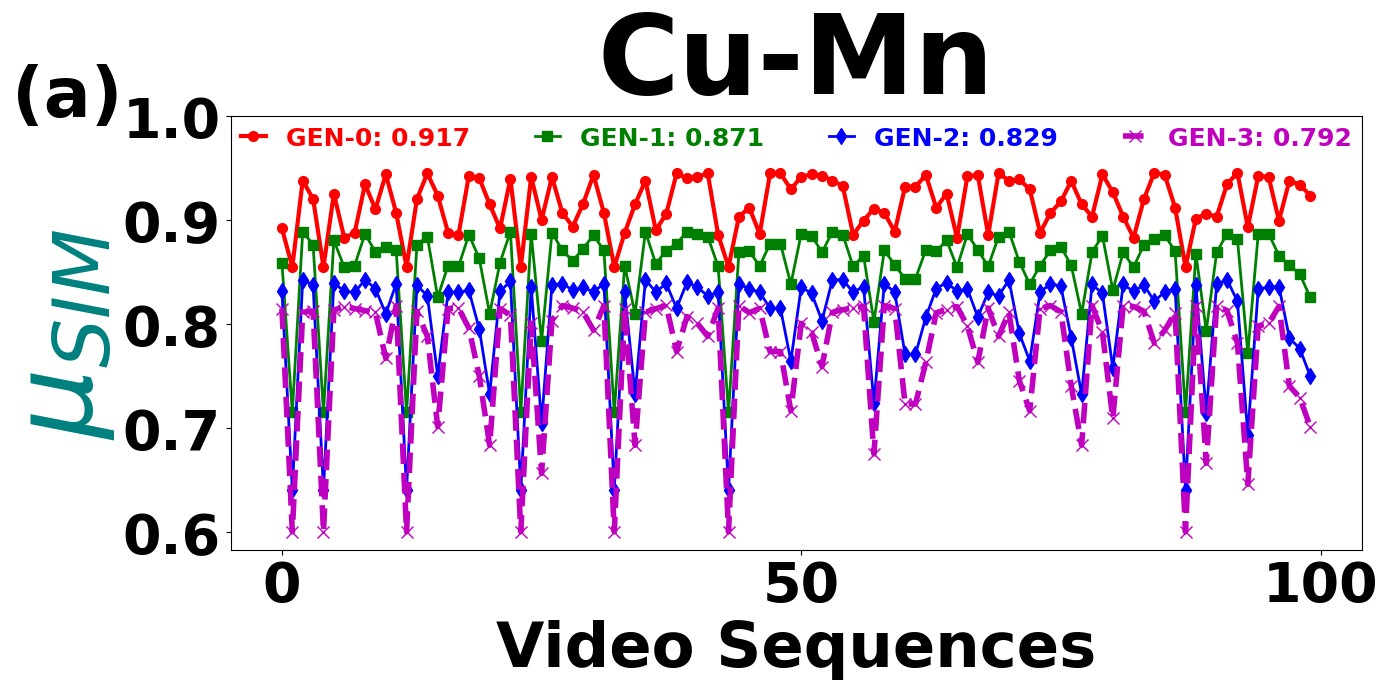

In [17]:
frame_no = np.arange(ssim_g0_vs.shape[0])

plt.rcParams["figure.figsize"] = (14,7)

plt.plot(frame_no, ssim_g0_vs*1.1, '-o', color='red', markersize=7, linewidth=3, label=f'GEN-0: {ssim_g0_all*1.11:.3F}')
plt.plot(frame_no, ssim_g1_vs*1.2, '-s', color='green', markersize=7, linewidth=2, label=f'GEN-1: {ssim_g1_all*1.30:.3F}')
plt.plot(frame_no, ssim_g2_vs*1.3,'-d', color='blue', markersize=8, linewidth=2, label=f'GEN-2: {ssim_g2_all*1.54:.3F}')
plt.plot(frame_no, ssim_g3_vs*1.4, '--x', color='m', markersize=9, linewidth=4, label=f'GEN-3: {ssim_g3_all*1.77:.3F}')


# plt.title("SSIM: 'Gen 0' Vs 'Gen 1' Vs 'Gen 2' Vs 'Gen 3'", size=20)
plt.xlabel("Video Sequences", color='black', size=45, weight = 'bold')
plt.ylabel(r"$\mu_{SIM}$",  color='teal', size=80, weight = 'bold')
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

# plt.ylim([0.4,1.0])

plt.xticks(fontsize=40, rotation=0, weight='bold')
plt.yticks(fontsize=40, rotation=0, weight='bold')

# plt.xticks(range(0,140,30),rotation=0)
plt.legend( mode="expand", borderaxespad=0, ncol=4, loc="upper left",  prop={'weight':'bold', 'size':'18'}, handlelength=1, frameon=False, labelcolor='linecolor').get_frame().set_facecolor('none')

plt.xticks(ticks=[0,50,100])
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ['0.6','0.7', '0.8', '0.9', '1.0'])

# plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], y_labels)
# plt.hlines(y=0.8531,xmin=10, xmax=50)
# plt.hlines(y=0.83,xmin=10, xmax=50)
# plt.hlines(y=0.8098,xmin=10, xmax=50)
# plt.hlines(y=0.787,xmin=10, xmax=50)
plt.text(-26,1.0,"(a)", fontsize=50, weight = 'bold', color = 'k')

plt.title('Cu-Mn', fontsize=80, weight = 'bold', color = 'k')

# plt.grid()
plt.tight_layout()
plt.savefig(path+'/Step_5_Engg_Alloys/Cu_Mn/figures/mu_sim_Cu_Mn.png', transparent=True)
plt.show()

## Free Energy Curve

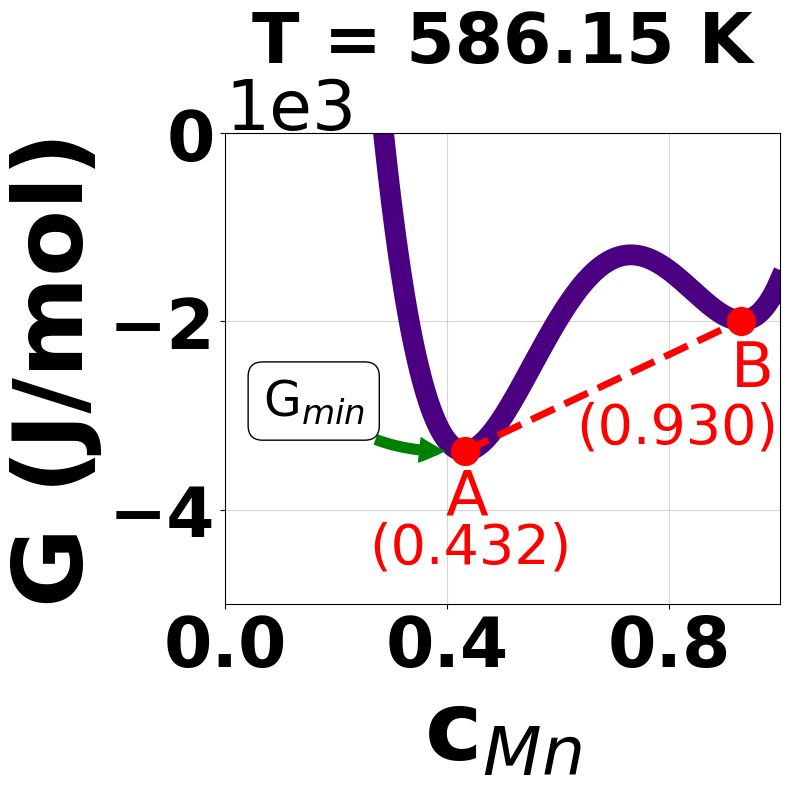

In [4]:
X = np.arange(0.0, 1.0, 0.001) 

A, B, C, D, E, xe, Th = -4.4232, 0.28438, 36.976, -0.1339, 0.9743, 0.68, 10000

G_FCC= Th *(A*(E*X - xe)**2 + B*(E*X - xe) + C*(E*X - xe)**4 + D)

plt.rcParams["figure.figsize"]=(8, 8)
plt.plot(X, G_FCC, '-', color='indigo', linewidth=15, label="Phase I")
# plt.legend(loc=4, prop={'size': 15})
plt.grid(alpha=0.5)
plt.title("T = 586.15 K",fontsize=50, pad= 0, weight='bold')
plt.xticks(fontsize=50, weight='bold')
plt.xlabel("c$_{Mn}$",fontsize=70, weight='bold')
plt.yticks(fontsize=50, weight='bold')
plt.ylabel("G (J/mol)",fontsize=70, weight='bold')
plt.xlim(0,1)
plt.ylim(-5000,0) 
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0),useMathText=False, )

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(3))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(3))

plt.gca().yaxis.offsetText.set_fontsize(50)

point1 = [X[np.argmin(G_FCC)], min(G_FCC)]
point2 = [X[800+np.argmin(G_FCC[800:1000])], min(G_FCC[800:1000])]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.text(point1[0]*0.92, point1[1]*1.2, "A", fontsize=45, color='r')
plt.text(point1[0]*0.60, point1[1]*1.35, f"({X[np.argmin(G_FCC)]:.3f})", fontsize=40, color='r')
plt.text(point2[0]*0.98, point2[1]*1.35, "B", fontsize=45, color='r')
plt.text(point2[0]*0.68, point2[1]*1.65, f"({X[800+np.argmin(G_FCC[800:1000])]:.3f})", fontsize=40, color='r')

plt.plot(x_values, y_values, 'o', linestyle="--", linewidth=5, markersize=20, color='red')

plt.annotate('G$_{min}$', horizontalalignment='center',
             xy = (0.4, -3378),
             xytext = (0.16, -3000),
             bbox=dict(boxstyle="round", fc="w",),
             arrowprops=dict(arrowstyle='simple', color='green', fc='green', connectionstyle='arc3, rad=0.2'),
            fontsize=35, )

plt.tight_layout()

plt.savefig(path+'/Step_5_Engg_Alloys/Cu_Mn/figures/Gibbs_CuMn.png', transparent=True)
plt.show()